# Advanced Classification - Logistic Regression - Exercises with Answers

## Exercise 1

#### Task 1 
##### Import the required packages to perform logistic regression.
##### Set the working directory to data directory.
##### Print the working directory.

#### Result:

In [122]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Scikit-learn package for logistic regression.
from sklearn import linear_model

# Model set up and tuning packages from scikit-learn.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Scikit-learn packages for evaluating model performance.
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scikit-learn package for data preprocessing
from sklearn import preprocessing

In [123]:
from pathlib import Path
# Set `home_dir` to the root directory of your computer.
home_dir = Path.home()

# Set `main_dir` to the location of your `advanced-classification` folder.
main_dir = home_dir / "Desktop" / "advanced-classification"

# Make `data_dir` from the `main_dir` and remainder of the path to data directory.
data_dir = main_dir / "data"

In [ ]:
# Change the working directory.
os.chdir(data_dir)

# Check the working directory.
print(os.getcwd())

#### Task 2
##### Load the dataset `bank_marketing.csv` and save it to `bank_marketing`.
##### Print the first few rows of `bank_marketing`.
##### Print the frequecy of the target variable `y`.

#### Result:

In [130]:
bank_marketing = pd.read_csv("bank_marketing.csv")
bank_marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [131]:
print(bank_marketing['y'].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


#### Task 3
##### Check for NA's `bank_marketing` and print the count of NA's in each column. If the missing value is from a integer type column, fill it with the mean value of the column.
##### Now, print the count of NA's in each column.

#### Result:

In [132]:
print(bank_marketing.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             1
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [133]:
bank_marketing = bank_marketing.fillna(bank_marketing.mean()['pdays'])

In [134]:
print(bank_marketing.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### Task 4
##### Check the data types of the columns.
##### Subset the dataset with only numeric columns and target variable and name it `bank_marketing_subset` .
##### Once you ensure that all variables are numeric, transform the target variable `y` to boolean and check the data type again.
##### Print the first few rows of `bank_marketing_subset_ex`.

#### Result:

In [135]:
bank_marketing.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
y                  object
dtype: object

In [136]:
bank_marketing_subset_ex = bank_marketing[["age","duration","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]]

# Check for all numeric variables now.
bank_marketing_subset_ex.dtypes

age                 int64
duration            int64
campaign            int64
pdays             float64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
y                  object
dtype: object

In [137]:
bank_marketing_subset_ex["y"] = np.where(bank_marketing_subset_ex["y"] == "yes", True, False)

# Check class again.
bank_marketing_subset_ex['y'].dtypes

C:\Users\aashe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dtype('bool')

In [138]:
bank_marketing_subset_ex.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,962.474567,0,1.1,93.994,-36.4,4.857,5191,False
1,57,149,1,999.000000,0,1.1,93.994,-36.4,4.857,5191,False
2,37,226,1,999.000000,0,1.1,93.994,-36.4,4.857,5191,False
3,40,151,1,999.000000,0,1.1,93.994,-36.4,4.857,5191,False
4,56,307,1,999.000000,0,1.1,93.994,-36.4,4.857,5191,False


#### Task 5
##### Select the predictors by dropping variable `y` and save the result to a dataframe `X_ex`.
##### Save the target variable `y` column to `y_ex` variable.
##### Set seed as 1.
##### Split the data into train and test sets and save respective variables to `X_train_ex`, `X_test_ex`, `y_train_ex`, `y_test_ex`.

#### Result:

In [139]:
# Select the predictors and target.
X_ex = bank_marketing_subset_ex.drop(['y'], axis = 1)
y_ex = np.array(bank_marketing_subset_ex['y'])

# Set the seed to 1.
np.random.seed(1)

# Split into training and test sets.
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex, y_ex, test_size = 0.3)

#### Task 6
##### Instantiate the logistic regression model and save it to `ex_logistic_regression_model`. Print it.
##### Fit the model with our training sets `X_train_ex` and `y_train_ex`.
##### Note: If you encounter any warning, use the code below to set up the logistic regression model.
##### logistic_regression_model_ex = linear_model.LogisticRegression(solver='lbfgs')

#### Result:

In [140]:
# Set up logistic regression model.
logistic_regression_model_ex = linear_model.LogisticRegression()
print(logistic_regression_model_ex)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


- Notice the default `C` value and `penalty`.

In [141]:
# Fit the model.
logistic_regression_model_ex.fit(X_train_ex, 
                                 y_train_ex)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Task 7
##### Now use the trained model to predict on our test set `X_test_ex`. Save as `predicted_values_ex`.
##### Print the vector of predictions obtained.

#### Result:

In [142]:
# Predict on test data.
predicted_values_ex = logistic_regression_model_ex.predict(X_test_ex)
print(predicted_values_ex)

[False False False ... False False False]


## Exercise 2

#### Task 1
##### Create a confusion matrix using the `metrics.confusion_matrix()` function.
##### Save as `conf_matrix_ex` and print.
##### What can you determine by looking at the confusion matrix?

#### Result:

In [143]:
conf_matrix_ex = metrics.confusion_matrix(y_test_ex, predicted_values_ex)
print(conf_matrix_ex)

[[10662   282]
 [  864   549]]


- We see that the model has performed well in predicting correctly. We can expect a high accuracy.

#### Task 2
##### Calculate the accuracy of our model by comparing our predicted values against our test set `y_test_ex`.
##### Save as `test_accuracy_ex` and print.

#### Result:

In [144]:
test_accuracy_ex = metrics.accuracy_score(y_test_ex, predicted_values_ex)
print("Accuracy on test data: ", test_accuracy_ex)

Accuracy on test data:  0.9072590434571498


#### Task 3
##### Create a list named `target_names` with the class names, `no` and `yes`.
##### Create a report `class_report_ex` using our test values `y_test_ex` and predicted values `predicted_values_ex` with the following columns:
- precision
- recall
- f1-score
- target_names

#### Result:

In [145]:
# Create a list of target names to interpret class assignments.
target_names = ['no', 'yes']

In [146]:
# Print an entire classification report.
class_report_ex = metrics.classification_report(y_test_ex, 
                                             predicted_values_ex, 
                                             target_names = target_names)
print(class_report_ex)

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10944
         yes       0.66      0.39      0.49      1413

    accuracy                           0.91     12357
   macro avg       0.79      0.68      0.72     12357
weighted avg       0.89      0.91      0.90     12357



#### Task 4
##### Create a dataframe to store the accuracy and the model used. Name the dataframe as `model_final_ex`.
##### Pickle the dataframe to the file `model_final_ex`.

#### Result:

In [147]:
# Create a dictionary with accuracy values for our knn model with k = 5.
model_final_dict = {'metrics': ["accuracy"],
                    'values':[round(test_accuracy_ex, 4)],
                    'model':['logistic']}

model_final_ex = pd.DataFrame(data = model_final_dict)
print(model_final_ex)

    metrics  values     model
0  accuracy  0.9073  logistic


In [148]:
pickle.dump(model_final_ex, open("model_final_ex.sav","wb" ))

#### Task 5
##### Get the probabilities of predicted values `X_test_ex` and save as `test_probabilities_ex`.
##### Then, calculate the probabilities of test predictions only.

#### Result:

In [149]:
# Get probabilities instead of predicted values.
test_probabilities_ex = logistic_regression_model_ex.predict_proba(X_test_ex)
print(test_probabilities_ex[0:5, :])

[[0.93620735 0.06379265]
 [0.99143647 0.00856353]
 [0.92107917 0.07892083]
 [0.95080845 0.04919155]
 [0.99123398 0.00876602]]


In [150]:
# Get probabilities of test predictions only.
test_predictions = test_probabilities_ex[:, 1]
print(test_predictions[0:5])

[0.06379265 0.00856353 0.07892083 0.04919155 0.00876602]


#### Task 6
##### Derive the `fpr`, `tpr`, and the `threshold` using our test set and predictions.
##### Then, calculate the `auc` using the derived `fpr` and `tpr`.

#### Result:

In [151]:
# Get FPR, TPR, and threshold values.
fpr, tpr, threshold = metrics.roc_curve(y_test_ex,         #<- test data labels
                                        test_predictions)  #<- predicted probabilities

In [152]:
# Get AUC by providing the FPR and TPR.
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve: ", auc)

Area under the ROC curve:  0.921285949599169


#### Task 7
##### Plot ROC curve plot using the values derived above.

##### Result:

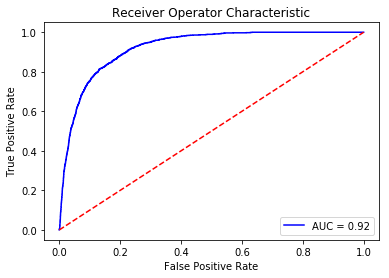

In [153]:
# Make a ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Exercise 3

#### Task 1
##### Use the dataframe `bank_marketing` and print the datatypes of all the columns. Convert all the categorical columns to dummy variables.
##### The datatype of target variable needs to be binary. Check for the datatype of the target variable and convert it to binary.

#### Result:

In [154]:
bank_marketing.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
y                  object
dtype: object

In [155]:
bank_marketing = pd.get_dummies(bank_marketing, columns=['job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

In [156]:
bank_marketing["y"] = np.where(bank_marketing["y"] == "yes", True, False)

# Check class again.
print(bank_marketing.y.dtypes)

bool


#### Task 2
##### As we did before, split the dataset into predictors `ex_X` and target `ex_y`.
##### Save target variable `y` as an np array to `ex_y`.
##### Save the rest of the variables to `ex_X`.

#### Result:

In [157]:
# We can drop just the target variable, as we are using all other variables as predictors.
ex_X = bank_marketing.drop('y', axis = 1)
ex_y = np.array(bank_marketing['y'])

#### Task 3
##### Split our data `ex_X` and `ex_y` into training and test sets. Split 70% into the training set and remaining 30% into the test set.
##### Save them as `ex_X_train`, `ex_X_test`, `ex_y_train` and `ex_y_test` respectively.
##### Make sure to set the seed to 2 so you can replicate the results.

#### Result:

In [158]:
# Set the seed.
np.random.seed(2)
# Split into training and test sets.
ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_X, 
                                                                ex_y, 
                                                                test_size=0.3) 

#### Task 4
##### Instantiate the logistic regression model and save it to `ex_logistic_regression_model`. Print it.
##### Fit the model with our training sets `ex_X_train` and `ex_y_train`.

#### Result:

In [159]:
# Set up logistic regression model.
ex_logistic_regression_model = linear_model.LogisticRegression(solver='liblinear')
print(ex_logistic_regression_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [160]:
# Fit the model.
ex_logistic_regression_model.fit(ex_X_train, 
                                 ex_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Task 5
##### Now use the trained model to predict on our test set `ex_X_test`. Save as `ex_predicted_values`.
##### Print the vector of predictions obtained.
##### Create a confusion matrix using the `metrics.confusion_matrix()` function.
##### Save as `ex_conf_matrix` and print.
##### Calculate the accuracy of our model by comparing our predicted values against our test set `ex_y_test`.

#### Result:

In [161]:
# Predict on test data.
ex_predicted_values = ex_logistic_regression_model.predict(ex_X_test)
print(ex_predicted_values)

[False False False ... False False False]


In [162]:
ex_conf_matrix = metrics.confusion_matrix(ex_y_test, ex_predicted_values)
print(ex_conf_matrix)

[[10672   282]
 [  849   554]]


In [163]:
# Compute test model accuracy score.
ex_test_accuracy = metrics.accuracy_score(ex_y_test, ex_predicted_values)
print("Accuracy on test data: ", ex_test_accuracy)

Accuracy on test data:  0.9084729303228939


#### Task 6

##### Load the pickled dataset `model_final_ex.sav` which we saved earlier.

##### Add the accuracy score `ex_test_accuracy` calculated above with the model name as `logistic_withdummies` to the dataframe `ex_model_final` which we created earlier and view the output.

#### Result:

In [164]:
model_final_ex = pickle.load(open("model_final_ex.sav","rb"))

model_final_ex = model_final_ex.append({'metrics' : "accuracy" , 
                                  'values' : round(ex_test_accuracy,4),
                                  'model':'logistic_withdummies' } , 
                                  ignore_index=True)
print(model_final_ex)

    metrics  values                 model
0  accuracy  0.9073              logistic
1  accuracy  0.9085  logistic_withdummies


#### Task 7
##### Create a list named `target_names` with the class names as `no` and `yes`.
##### Create a report `ex_class_report` using our test values `ex_y_test` and predicted values `ex_predicted_values` with the following columns:
- precision
- recall
- f1-score
- target_names

#### Result:

In [165]:
# Create a list of target names to interpret class assignments.
target_names = ['no', 'yes']

In [166]:
# Print an entire classification report.
class_report = metrics.classification_report(ex_y_test, 
                                             ex_predicted_values, 
                                             target_names = target_names)
print(class_report)

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10954
         yes       0.66      0.39      0.49      1403

    accuracy                           0.91     12357
   macro avg       0.79      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



#### Task 8
##### Get the probabilities of predicted values `ex_X_test` and save as `ex_test_probabilities`.
##### Then calculate the probabilities of test predictions named `ex_test_predictions`  only. 

#### Result:

In [167]:
# Get probabilities instead of predicted values.
ex_test_probabilities = ex_logistic_regression_model.predict_proba(ex_X_test)
print(ex_test_probabilities[0:5, :])

[[0.98814423 0.01185577]
 [0.99028194 0.00971806]
 [0.7302287  0.2697713 ]
 [0.99279934 0.00720066]
 [0.99103496 0.00896504]]


In [168]:
# Get probabilities of test predictions only.
ex_test_predictions = ex_test_probabilities[:, 1]
print(ex_test_predictions[0:5])

[0.01185577 0.00971806 0.2697713  0.00720066 0.00896504]


#### Task 9
##### Derive the `fpr`, `tpr`, and the `threshold` using our test set and predictions.
##### Then calculate the `auc` using the derived `fpr` and `tpr`.

#### Result:

In [169]:
# Get FPR, TPR, and threshold values.
fpr, tpr, threshold = metrics.roc_curve(ex_y_test,            #<- test data labels
                                        ex_test_predictions)  #<- predicted probabilities

In [170]:
# Get AUC by providing the FPR and TPR.
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve: ", auc)

Area under the ROC curve:  0.9249883299968468


#### Task 10
##### Plot and ROC curve plot using the values derived above.

#### Result:

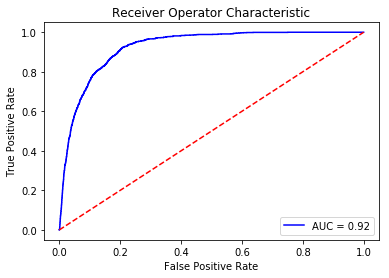

In [171]:
# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Exercise 4

#### Task 1
##### Create regularization penalty space named `penalty` and regularization constant space `C` as in slides.
##### Then create the hyperparameter dictionary named `hyperparameters`.

#### Result:

In [172]:
# Create regularization penalty space.
penalty = ['l1', 'l2']
# Create regularization constant space.
C = np.logspace(0, 10, 10)
print("Regularization constant: ", C)

Regularization constant:  [1.00000000e+00 1.29154967e+01 1.66810054e+02 2.15443469e+03
 2.78255940e+04 3.59381366e+05 4.64158883e+06 5.99484250e+07
 7.74263683e+08 1.00000000e+10]


In [173]:
# Create hyperparameter options dictionary.
hyperparameters = dict(C = C, penalty = penalty)
print(hyperparameters)

{'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]), 'penalty': ['l1', 'l2']}


#### Task 2
##### Set up the 5-fold cross-validation function named `ex_clf`  with the parameters created above.
##### Fit the function with our training set. Save as `ex_best_model`.
##### Note: If you encounter a convergence warning, use the below code
##### ex_clf = GridSearchCV(linear_model.LogisticRegression(solver='liblinear', max_iter=2500), hyperparameters, cv = 5, verbose = 0,                  iid='deprecated')

#### Result:

In [174]:
# Grid search 5-fold cross-validation with above parameters.
ex_clf = GridSearchCV(linear_model.LogisticRegression(solver='liblinear'), #<- function to optimize
                   hyperparameters,                   #<- grid search parameters
                   cv = 5,                            #<- 5-fold cv
                   verbose = 0)                      #<- no messages to show



In [ ]:
# Fit CV grid search.
ex_best_model = ex_clf.fit(ex_X_train, ex_y_train)
ex_best_model

#### Task 3
##### Derive the best penalty and constant parameters. Print them.

#### Result:

In [77]:
# Get best penalty and constant parameters.
penalty = ex_best_model.best_estimator_.get_params()['penalty']
constant = ex_best_model.best_estimator_.get_params()['C']
print('Best penalty: ', penalty)
print('Best C: ', constant)

Best penalty:  l2
Best C:  166.81005372000593


#### Task 4
##### Print the vector of predicted values named `ex_best_predicted_values`.
##### Also find the accuracy score `ex_best_accuracy_score` and print.

#### Result:

In [78]:
# Predict on test data using best model.
ex_best_predicted_values = ex_best_model.predict(ex_X_test)
print(ex_best_predicted_values)

[False False False ... False False False]


In [79]:
# Compute best model accuracy score.
ex_best_accuracy_score = metrics.accuracy_score(ex_y_test, ex_best_predicted_values)
print("Accuracy on test data (best model): ", ex_best_accuracy_score)

Accuracy on test data (best model):  0.9084729303228939


#### Task 5
##### Compute the confusion matrix and classification report as above. Save as `ex_best_confusion_matrix` and `ex_best_class_report` respectively.

#### Result:

In [80]:
# Compute confusion matrix for best model.
ex_best_confusion_matrix = metrics.confusion_matrix(ex_y_test, ex_best_predicted_values)
print(ex_best_confusion_matrix)

[[10672   282]
 [  849   554]]


In [81]:
# Create a list of target names to interpret class assignments.
target_names = ['no', 'yes']
# Compute classification report for best model.
ex_best_class_report = metrics.classification_report(ex_y_test, 
                                                     ex_best_predicted_values, 
                                                     target_names = target_names)
print(ex_best_class_report)

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10954
         yes       0.66      0.39      0.49      1403

    accuracy                           0.91     12357
   macro avg       0.79      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



#### Task 6
##### Add this accuracy score with the model name as `logistic_tuned` to our `ex_model_final` dataframe.
##### Pickle this dataset as `ex_model_final_logistic.sav`.

#### Result:

In [175]:
model_final_ex = model_final_ex.append({'metrics' : "accuracy" , 
                                  'values' : round(ex_test_accuracy,4),
                                  'model':'logistic_tuned' } , 
                                  ignore_index=True)
print(model_final_ex)

    metrics  values                 model
0  accuracy  0.9073              logistic
1  accuracy  0.9085  logistic_withdummies
2  accuracy  0.9085        logistic_tuned


In [176]:
pickle.dump(model_final_ex, open("ex_model_final_logistic.sav","wb" ))

#### Task 7
##### Same as before, compute the test probabilities `ex_best_test_probabilities` and 
##### test predictions `ex_best_test_predictions`.
##### Derive the metrics `fpr`, `tpr`, and `threshold` to plot the ROC curve. Also derive the AUC.

#### Result:

In [87]:
# Get probabilities instead of predicted values.
ex_best_test_probabilities = ex_best_model.predict_proba(ex_X_test)
print(ex_best_test_probabilities[0:5, ])

[[0.98814623 0.01185377]
 [0.99028578 0.00971422]
 [0.73020007 0.26979993]
 [0.99280034 0.00719966]
 [0.991039   0.008961  ]]


In [88]:
# Get probabilities of test predictions only.
ex_best_test_predictions = ex_best_test_probabilities[:, 1]
print(ex_best_test_predictions[0:5])

[0.01185377 0.00971422 0.26979993 0.00719966 0.008961  ]


In [89]:
# Get ROC curve metrics.
ex_best_fpr, ex_best_tpr, ex_best_threshold = metrics.roc_curve(ex_y_test, ex_best_test_predictions)
ex_best_auc = metrics.auc(ex_best_fpr, ex_best_tpr)
print(ex_best_auc)

0.9249941861456275


#### Task 8
##### Plot the ROC curve for both models.

#### Result:

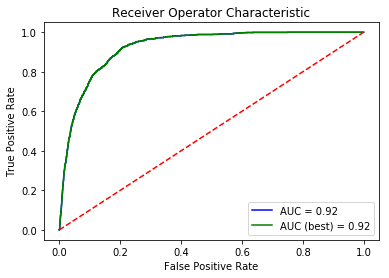

In [90]:
# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', 
         label = 'AUC = %0.2f'%auc)
plt.plot(ex_best_fpr, ex_best_tpr, 'g', 
         label = 'AUC (best) = %0.2f'%ex_best_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()